In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
os.chdir('/content/drive/My Drive')
!pwd

#df = pd.read_csv (r'/content/drive/My Drive/FAFdata.csv')  
#print (df)

# Load CSV
import numpy
filename = 'FAFdata.csv'
raw_data = open(filename, 'rt')
data = numpy.loadtxt(raw_data, delimiter=",")
print(data.shape)

x1 = data[0:61,0:18]    #Normal
x2 = data[61:82,0:18]   #CSCR
x3 = data[82:96,0:18]   #CNVM
x4 = data[96:140,0:18]  #STGD
x = numpy.concatenate([x1,x2,x3,x4],axis=0)

y1 =data[0:61,18]
y2 =data[61:82,18]
y3 =data[82:96,18]
y4 =data[96:140,18]
y = numpy.concatenate([y1,y2,y3,y4],axis=0)

print(y)

#!pip install sklearn



/content/drive/My Drive
(140, 19)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
n_estimators=500
itern = 1000

Acc_tr = np.zeros(10) 
Acc_ts = np.zeros(10)

In [0]:


for t in range (9,10):
  sr = t*0.1
  res_tr=0
  res_ts=0


  for iter in range(itern):
    a_tr = numpy.zeros(itern)
    a_ts = numpy.zeros(itern)

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score

    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=sr)
    #x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=sr)
    #x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=sr)
    #x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=sr)
    #x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=sr)


    #x_train = numpy.concatenate([x1_train,x2_train,x3_train,x4_train],axis=0)
    #x_test = numpy.concatenate([x1_test,x2_test,x3_test,x4_test],axis=0)
    #y_train = numpy.concatenate([y1_train,y2_train,y3_train,y4_train],axis=0)
    #y_test = numpy.concatenate([y1_test,y2_test,y3_test,y4_test],axis=0)
    
  


    # Create the model with 100 trees
    model = RandomForestClassifier(n_estimators, 
                                   bootstrap = True,
                                   max_features = 'sqrt')
    # Fit on training data
    model.fit(x_train, y_train)

    # --- Predictions ---

    rf_pred_tr = model.predict(x_train)
    a_tr[iter] = accuracy_score(rf_pred_tr, y_train)

    rf_pred_ts = model.predict(x_test)
    a_ts[iter] = accuracy_score(rf_pred_ts, y_test)

    res_tr += a_tr[iter]
    res_ts += a_ts[iter]
    print(iter)
    
  
  print(sr)
  print(res/n_estimators)
  Acc_tr[t] = res_tr/itern
  Acc_ts[t] = res_ts/itern

  # Probabilities for each class
  #rf_probs = model.predict_proba(test)[:, 1]

  #from sklearn.metrics import roc_auc_score

  # Calculate roc auc
  #roc_value = roc_auc_score(test_labels, rf_probs)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.889      0.88035714 0.8764186  0.86121429 0.85488571
 0.83917647 0.82169697 0.78566071 0.70569841]


Text(0, 0.5, 'Accuracy')

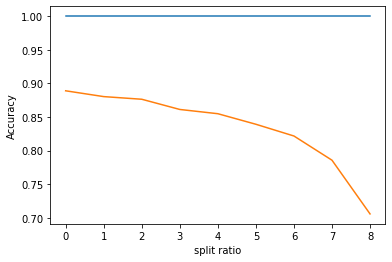

In [0]:
print(Acc_tr)
print(Acc_ts)


import matplotlib.pyplot as plt
plt.plot(Acc_tr[1:10])#[1:15])
plt.plot(Acc_ts[1:10])#[15:35,])
plt.xlabel('split ratio')
plt.ylabel('Accuracy')

[0.70569841 0.78566071 0.82169697 0.83917647 0.85488571 0.86121429
 0.8764186  0.88035714 0.889      0.        ]


Text(0, 0.5, 'Accuracy')

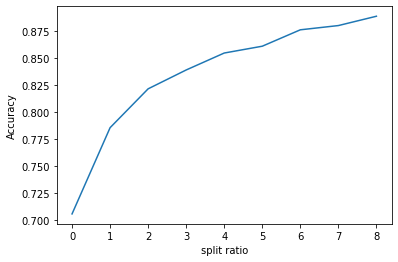

In [0]:
print(Acc_ts[::-1])
new = Acc_ts[::-1]
plt.plot(new[0:9])#[15:35,])
plt.xlabel('split ratio')
plt.ylabel('Accuracy')

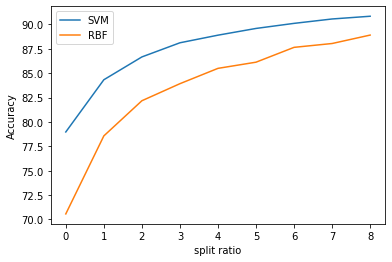

In [0]:
sv = [78.97, 84.32, 86.66, 88.11,88.89,89.58,90.10,90.55,90.83]
plt.plot(sv[0:9],label ='SVM')

plt.plot(new[0:9]*100,label ='RBF')#[15:35,])
plt.xlabel('split ratio')
plt.ylabel('Accuracy')
plt.legend()
